In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords

In [5]:
train = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Train.xlsx')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [6]:
test = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Test.xlsx')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.6+ KB


In [7]:
val = pd.read_excel('/content/drive/MyDrive/FakeNewsData/fakeNewsData/Constraint_English_Val.xlsx')
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [8]:
import matplotlib.pyplot as plt

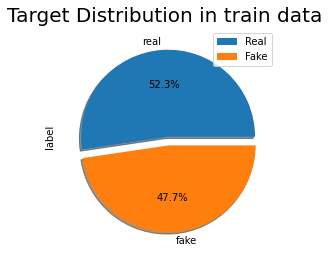

In [9]:
train['label'].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(4, 4),autopct='%1.1f%%',shadow=True)
plt.title("Target Distribution in train data ",fontsize=20)
plt.legend(["Real","Fake"])
plt.show()

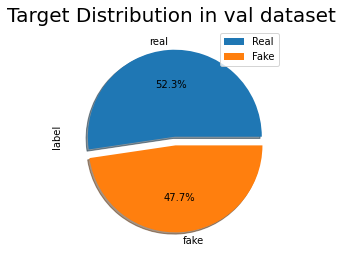

In [10]:
val['label'].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(4, 4),autopct='%1.1f%%',shadow=True)
plt.title("Target Distribution in val dataset ",fontsize=20)
plt.legend(["Real","Fake"])
plt.show()

 Data looks balancing

# Model Building

In [28]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stops = set(stopwords.words("english"))
def processtext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = re.sub(r"http(\S)+",' ',text)        
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [16]:
train['cleaned'] = train['tweet'].map(lambda x: processtext(x))
val['cleaned'] = val['tweet'].map(lambda x: processtext(x))
test['cleaned'] =  test['tweet'].map(lambda x: processtext(x))

In [17]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))
    
    

## SVM

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import itertools

In [26]:
  pipeline = Pipeline([
          ('bow', CountVectorizer()),  
          ('tfidf', TfidfTransformer()),  
          ('c', LinearSVC())
      ])
  fit = pipeline.fit(train['cleaned'],train['label'])

In [39]:
pred=pipeline.predict(train['cleaned'])


[[ 939   81]
 [  53 1067]]
              precision    recall  f1-score   support

        fake       0.95      0.92      0.93      1020
        real       0.93      0.95      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9373831775700935
Precison :  0.9378030511269928
Recall :  0.9373831775700935
F1 :  0.9374323575106416


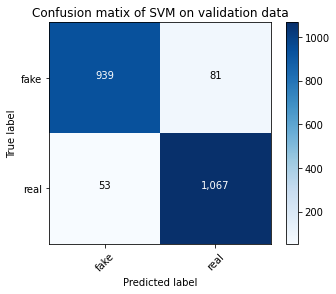

In [33]:
pred=pipeline.predict(val['cleaned'])
print_metrices(pred,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on validation data')

In [35]:
test_with_labels = pd.read_excel("/content/drive/MyDrive/FakeNewsData/fakeNewsData/english_test_with_labels.xlsx")

In [36]:
test_with_labels['cleaned'] = test['cleaned']

[[ 948   72]
 [  56 1064]]
              precision    recall  f1-score   support

        fake       0.94      0.93      0.94      1020
        real       0.94      0.95      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9401869158878504
Precison :  0.9403408466190215
Recall :  0.9401869158878504
F1 :  0.940211228104923


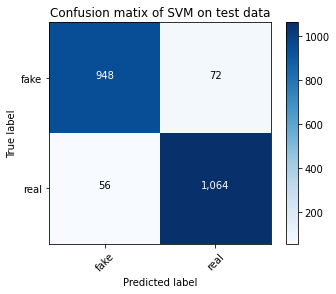

In [37]:
pred=pipeline.predict(test_with_labels['cleaned'])
print_metrices(pred,test_with_labels['label'])
plot_confusion_matrix(confusion_matrix(test_with_labels['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on test data')
